># **PROJECT: CREDIT CARD FRAUD DETECTION**

>**Introduction**

Here is a machine learning model to detect fraudulent credit card transactions. I have used different techniques, and experiment them with algorithms like Logistic Regression, Decision Trees, and Random Forests to classify transactions as fraudulent or legitimate.

**Load Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import shutil
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Load Datasets**

In [ ]:
train_data = pd.read_csv("/content/fraudTrain.csv")
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_data = pd.read_csv("/content/fraudTest.csv")
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


># **Data Preprocessing**

In [ ]:
train_data.info() , test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

In [ ]:
train_data.isnull().sum() , test_data.isnull().sum()

(Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip                      0
 lat                      0
 long                     0
 city_pop                 0
 job                      0
 dob                      0
 trans_num                0
 unix_time                0
 merch_lat                0
 merch_long               0
 is_fraud                 0
 dtype: int64,
 Unnamed: 0               0
 trans_date_trans_time    0
 cc_num                   0
 merchant                 0
 category                 0
 amt                      0
 first                    0
 last                     0
 gender                   0
 street                   0
 city                     0
 state                    0
 zip 

In [ ]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [ ]:
print('Total number of duplicated rows in train_data:', train_data.duplicated().sum())
print('Total number of duplicated rows in test_data:', test_data.duplicated().sum())

Total number of duplicated rows in train_data: 0
Total number of duplicated rows in test_data: 0


In [ ]:
train_data = train_data.set_index('Unnamed: 0')
train_data = train_data.rename_axis('Id')

test_data = test_data.set_index('Unnamed: 0')
test_data = test_data.rename_axis('Id')


In [ ]:
print(f"train data shape: {train_data.shape}")

print(f"test  data shape: {test_data.shape}")

train data shape: (1296675, 22)
test  data shape: (555719, 22)


**Imbalance data check**

In [ ]:
class_distribution = train_data['is_fraud'].value_counts()

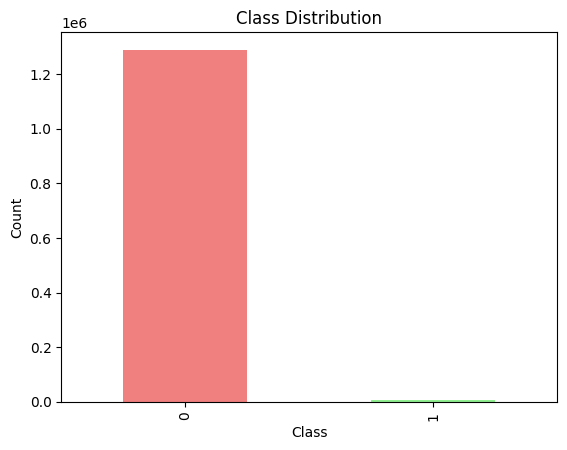

In [ ]:
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['lightcoral','lightgreen'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
imbalance_ratio = class_distribution[0] / class_distribution[1]
print(f'Imbalance Ratio: {imbalance_ratio:.2f}')

Imbalance Ratio: 171.75


**Feature Engineering**

In [ ]:
print(f'columns of train dataset :', train_data.columns)
print(f'columns of test dataset :', test_data.columns)

columns of train dataset : Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')
columns of test dataset : Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [ ]:
#Define a function to calculate Haversine distance(bascially calculating the distance b/w merchant and credit card holder)
def haversine(lat1, lon1, lat2, lon2):
    #Radius of the Earth in kilometers
    R = 6371.0

    #Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    #Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    #Calculate the distance
    distance = R * c
    return distance

#Calculate the distance for each row in datasets
train_data['distance'] = haversine(train_data['lat'], train_data['long'], train_data['merch_lat'], train_data['merch_long'])
test_data['distance'] = haversine(test_data['lat'], test_data['long'], test_data['merch_lat'], test_data['merch_long'])

In [ ]:
#Convert 'trans_date_trans_time' to datetime DataFrame and extract year, month and day of train and test data
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['transaction_year'] = train_data['trans_date_trans_time'].dt.year
train_data['transaction_month'] = train_data['trans_date_trans_time'].dt.month
train_data['transaction_day'] = train_data['trans_date_trans_time'].dt.day

test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['transaction_year'] = test_data['trans_date_trans_time'].dt.year
test_data['transaction_month'] = test_data['trans_date_trans_time'].dt.month
test_data['transaction_day'] = test_data['trans_date_trans_time'].dt.day

In [ ]:
#Extract the age of card holder
train_data['dob'] = pd.to_datetime(train_data['dob'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

current_year = pd.Timestamp.now().year
train_data['age'] = current_year - train_data['dob'].dt.year
test_data['age'] = current_year - test_data['dob'].dt.year


**Data Visualizations**

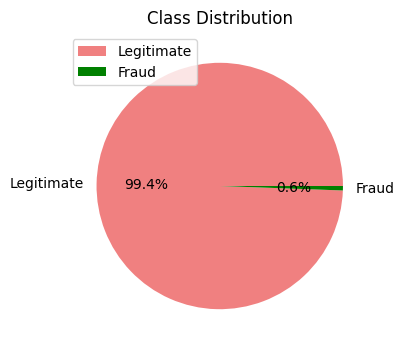

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(class_distribution, labels=['Legitimate', 'Fraud'], autopct='%1.1f%%', colors=['lightcoral','green'])
plt.title('Class Distribution')
plt.legend(loc='upper left', fontsize=10)
plt.show()


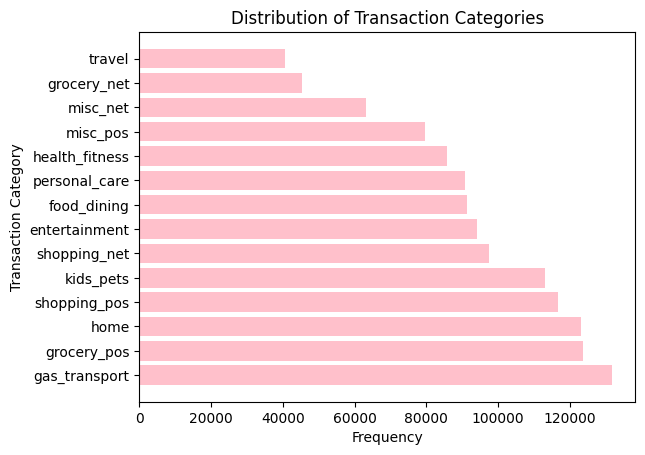

In [ ]:
plt.barh(train_data['category'].value_counts().index, train_data['category'].value_counts().values, color= 'pink')
plt.xlabel('Frequency')
plt.ylabel('Transaction Category')
plt.title('Distribution of Transaction Categories')
plt.show()


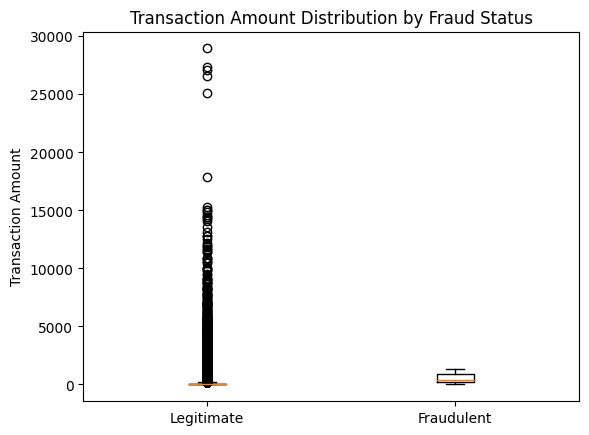

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([train_data[train_data['is_fraud'] == 0]['amt'], train_data[train_data['is_fraud'] == 1]['amt']], labels=['Legitimate', 'Fraudulent'])
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution by Fraud Status')
plt.show()


**Removing unwanted columns**

In [ ]:
#Columns to drop
drop_columns= ['cc_num','trans_num','first','city','merchant','job', 'last','street','unix_time','zip','lat','long', 'merch_lat',
               'merch_long','trans_date_trans_time','dob','state']

train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

In [ ]:
train_data.shape , test_data.shape

((1296675, 10), (555719, 10))

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   category           1296675 non-null  object 
 1   amt                1296675 non-null  float64
 2   gender             1296675 non-null  object 
 3   city_pop           1296675 non-null  int64  
 4   is_fraud           1296675 non-null  int64  
 5   distance           1296675 non-null  float64
 6   transaction_year   1296675 non-null  int64  
 7   transaction_month  1296675 non-null  int64  
 8   transaction_day    1296675 non-null  int64  
 9   age                1296675 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 108.8+ MB


In [ ]:
#One-hot encoding for 'category' column
train_data = pd.get_dummies(train_data, columns=['category'])
test_data = pd.get_dummies(test_data, columns=['category'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder for the 'gender' column
label_encoder = LabelEncoder()

# Apply label encoding to the 'gender' column
train_data['gender'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender'] = label_encoder.fit_transform(test_data['gender'])


**Train Test Split**

In [ ]:
X = train_data.drop('is_fraud', axis=1)  #Features
y = train_data['is_fraud']  #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Handling Imbalanced Data with SMOTE()**


In [ ]:
from imblearn.over_sampling import SMOTE

#Handling Imbalanced Data (Example with SMOTE)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

#features will have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Selection**

In [ ]:
#Import necessary Libraris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Modle Evaluation metrics function
def evaluate_model(predictions, y_true, model_name):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions)
    recall = recall_score(y_true, predictions)
    f1 = f1_score(y_true, predictions)
    roc_auc = roc_auc_score(y_true, predictions)
    result = {
    "Model": model_name,
    f"Accuracy": f"{accuracy:.2f}",
    "Precision": f"{precision:.2f}",
    "Recall": f"{recall:.2f}",
    "F1 Score": f"{f1:.2f}",
    "ROC AUC": f"{roc_auc:.2f}"
}

    for key, value in result.items():
        print(f"{key}: {value}")

    return result

**Logistic Regression**

In [ ]:
#Model Selection
logistic_model = LogisticRegression()

#Model Training
logistic_model.fit(X_train, y_train)

#Model Evaluation
logistic_predictions = logistic_model.predict(X_test)

logistic_scores = evaluate_model(logistic_predictions, y_test, "Logistic Regression Scores:")

Model: Logistic Regression Scores:
Accuracy: 0.97
Precision: 0.15
Recall: 0.74
F1 Score: 0.25
ROC AUC: 0.86


**Decision Tree Classifier**

In [ ]:
decision_tree_model = DecisionTreeClassifier()

decision_tree_model.fit(X_train, y_train)

decision_tree_predictions = decision_tree_model.predict(X_test)

decision_tree_scores = evaluate_model(decision_tree_predictions, y_test, "Decision Tree Scores:")


Model: Decision Tree Scores:
Accuracy: 1.00
Precision: 0.57
Recall: 0.72
F1 Score: 0.64
ROC AUC: 0.86


**Random Forest Classifier**

In [ ]:
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train)

random_forest_predictions = random_forest_model.predict(X_test)

random_forest_scores = evaluate_model(random_forest_predictions, y_test, "Random Forest Scores:")


Model: Random Forest Scores:
Accuracy: 1.00
Precision: 0.74
Recall: 0.78
F1 Score: 0.76
ROC AUC: 0.89


# **Best Model**

As it is clear from the results of Evaluation metrics(Accuracy, Precision,
 Recall, F1 Score,
ROC AUC) with the high scores that **"Random Forest"** is the best model to use for test data.

**Prediction on Test Data**

In [ ]:
#drop the target so that we can make predictions on unseen features
test_data = test_data.drop('is_fraud',axis=1)

In [ ]:
test_predictions = random_forest_model.predict(test_data)
test_data['is_fraud_or_not'] = test_predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
test_data.head()

,amt,gender,city_pop,distance,transaction_year,transaction_month,transaction_day,age,category_entertainment,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud_or_not
Id,,,,,,,,,,,,,,,,,,,,,
0,2.86,1,333497,24.561462,2020,6,21,55,0,0,...,0,0,0,0,0,1,0,0,0,0
1,29.84,0,302,104.925092,2020,6,21,33,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41.28,0,34496,59.080078,2020,6,21,53,0,0,...,1,0,0,0,0,0,0,0,0,0
3,60.05,1,54767,27.698567,2020,6,21,36,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3.19,1,1126,104.335106,2020,6,21,68,0,0,...,0,0,0,0,0,0,0,0,1,0
